# Author: ddukic

In [1]:
import wandb
import pandas as pd
import sys
import json
from statistics import mean, stdev
sys.path.append("../")
from result_utils import * 
%matplotlib inline

api = wandb.Api()

def fetch_run_summary(run_url):
    run_key = run_url.split("/")[-1]
    return api.run("ddukic/oee-paper/" + run_key).summary

In [2]:
results_seed_42 = json.load(open("seed_42.json", "r"))
results_seed_43 = json.load(open("seed_43.json", "r"))
results_seed_44 = json.load(open("seed_44.json", "r"))

In [3]:
temp = [[id for _, id in v.items()] for _, v in results_seed_42.items()]
wandb_keys = []

for x in temp:
    for k in x:
        wandb_keys.append(k)

print("all unique:", len(wandb_keys) == len(set(wandb_keys)))

all unique: True


In [4]:
results_check_all_equal = {
    k: {
        setting: extract_name(run_42).replace("SEED=42", "")
        == extract_name(run_43).replace("SEED=43", "")
        == extract_name(run_44).replace("SEED=44", "")
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

In [3]:
results_target_f1_table_data_mean = {
    k: {
        setting: format(
            round(
                mean(
                    [
                        extract_target_performance(fetch_run_summary(run_42), k, "f1"),
                        extract_target_performance(fetch_run_summary(run_43), k, "f1"),
                        extract_target_performance(fetch_run_summary(run_44), k, "f1"),
                    ]
                ),
                3,
            ),
            ".3f",
        )
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

results_target_f1_table_data_std = {
    k: {
        setting: format(
            round(
                stdev(
                    [
                        extract_target_performance(fetch_run_summary(run_42), k, "f1"),
                        extract_target_performance(fetch_run_summary(run_43), k, "f1"),
                        extract_target_performance(fetch_run_summary(run_44), k, "f1"),
                    ]
                ),
                3,
            ),
            ".3f",
        )
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

results_target_f1_plot_data = {
    k: {
        setting: mean(
            [
                extract_target_performance(fetch_run_summary(run_42), k, "f1"),
                extract_target_performance(fetch_run_summary(run_43), k, "f1"),
                extract_target_performance(fetch_run_summary(run_44), k, "f1"),
            ]
        )
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

# results_seed_42_target_f1_plot_data = {
#     k: {
#         setting: extract_target_performance(fetch_run_summary(run), k, "f1")
#         for setting, run in v.items()
#     }
#     for k, v in results_seed_42.items()
# }

# results_seed_42_target_precision = {
#     k: {setting: extract_target_performance(fetch_run_summary(run), k, "precision") for setting, run in v.items()}
#     for k, v in results_seed_42.items()
# }

# results_seed_42_target_recall = {
#     k: {setting: extract_target_performance(fetch_run_summary(run), k, "recall") for setting, run in v.items()}
#     for k, v in results_seed_42.items()
# }


In [7]:
df_f1 = pd.DataFrame.from_dict(results_target_f1_table_data_mean, orient="index")
print(df_f1.to_latex().replace("llll", "lrrr"))

\begin{tabular}{lrrr}
\toprule
{} & vanilla & implicit\_multitask & two\_head\_multitask \\
\midrule
0\_shot\_pretrained\_on\_source         &   0.650 &              0.650 &              0.653 \\
0\_shot\_from\_roberta                 &   0.069 &              0.090 &              0.077 \\
joint\_5\_shot\_from\_roberta           &   0.643 &              0.643 &              0.654 \\
joint\_10\_shot\_from\_roberta          &   0.645 &              0.645 &              0.658 \\
joint\_50\_shot\_from\_roberta          &   0.679 &              0.681 &              0.687 \\
joint\_100\_shot\_from\_roberta         &   0.715 &              0.721 &              0.725 \\
joint\_250\_shot\_from\_roberta         &   0.766 &              0.767 &              0.765 \\
joint\_500\_shot\_from\_roberta         &   0.793 &              0.798 &              0.792 \\
joint\_5\_shot\_pretrained\_on\_source   &   0.631 &              0.633 &              0.636 \\
joint\_10\_shot\_pretrained\_on\_source  &  

/tmp/ipykernel_55658/3942959778.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_f1.to_latex().replace("llll", "lrrr"))


In [5]:
df_f1 = pd.DataFrame.from_dict(results_target_f1_table_data_std, orient="index")
print(df_f1.to_latex().replace("llll", "lrrr"))

\begin{tabular}{lrrr}
\toprule
{} & vanilla & implicit\_multitask & two\_head\_multitask \\
\midrule
0\_shot\_pretrained\_on\_source         &   0.003 &              0.002 &              0.004 \\
0\_shot\_from\_roberta                 &   0.071 &              0.056 &              0.069 \\
joint\_5\_shot\_from\_roberta           &   0.004 &              0.001 &              0.002 \\
joint\_10\_shot\_from\_roberta          &   0.003 &              0.002 &              0.005 \\
joint\_50\_shot\_from\_roberta          &   0.005 &              0.008 &              0.007 \\
joint\_100\_shot\_from\_roberta         &   0.008 &              0.005 &              0.008 \\
joint\_250\_shot\_from\_roberta         &   0.010 &              0.008 &              0.004 \\
joint\_500\_shot\_from\_roberta         &   0.008 &              0.002 &              0.005 \\
joint\_5\_shot\_pretrained\_on\_source   &   0.004 &              0.006 &              0.002 \\
joint\_10\_shot\_pretrained\_on\_source  &  

/tmp/ipykernel_88963/524380686.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_f1.to_latex().replace("llll", "lrrr"))


In [6]:
# df_pr = (
#     pd.DataFrame.from_dict(results_seed_42_target_precision_table_data, orient="index")
#     .astype(str)
#     .add("/")
#     .add(
#         pd.DataFrame.from_dict(results_seed_42_target_recall_table_data, orient="index").astype(
#             str
#         )
#     )
# )
# print(df_pr.to_latex().replace("llll", "lrrr"))

In [5]:
df_f1 = df_f1 = pd.DataFrame.from_dict(results_target_f1_plot_data, orient="index")
df_f1 = transform_df(df_f1)
df_f1.to_csv("no_mlm.csv", index=False)

/home/ddukic/oee/results/maven_to_evextra/../result_utils.py:91: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(


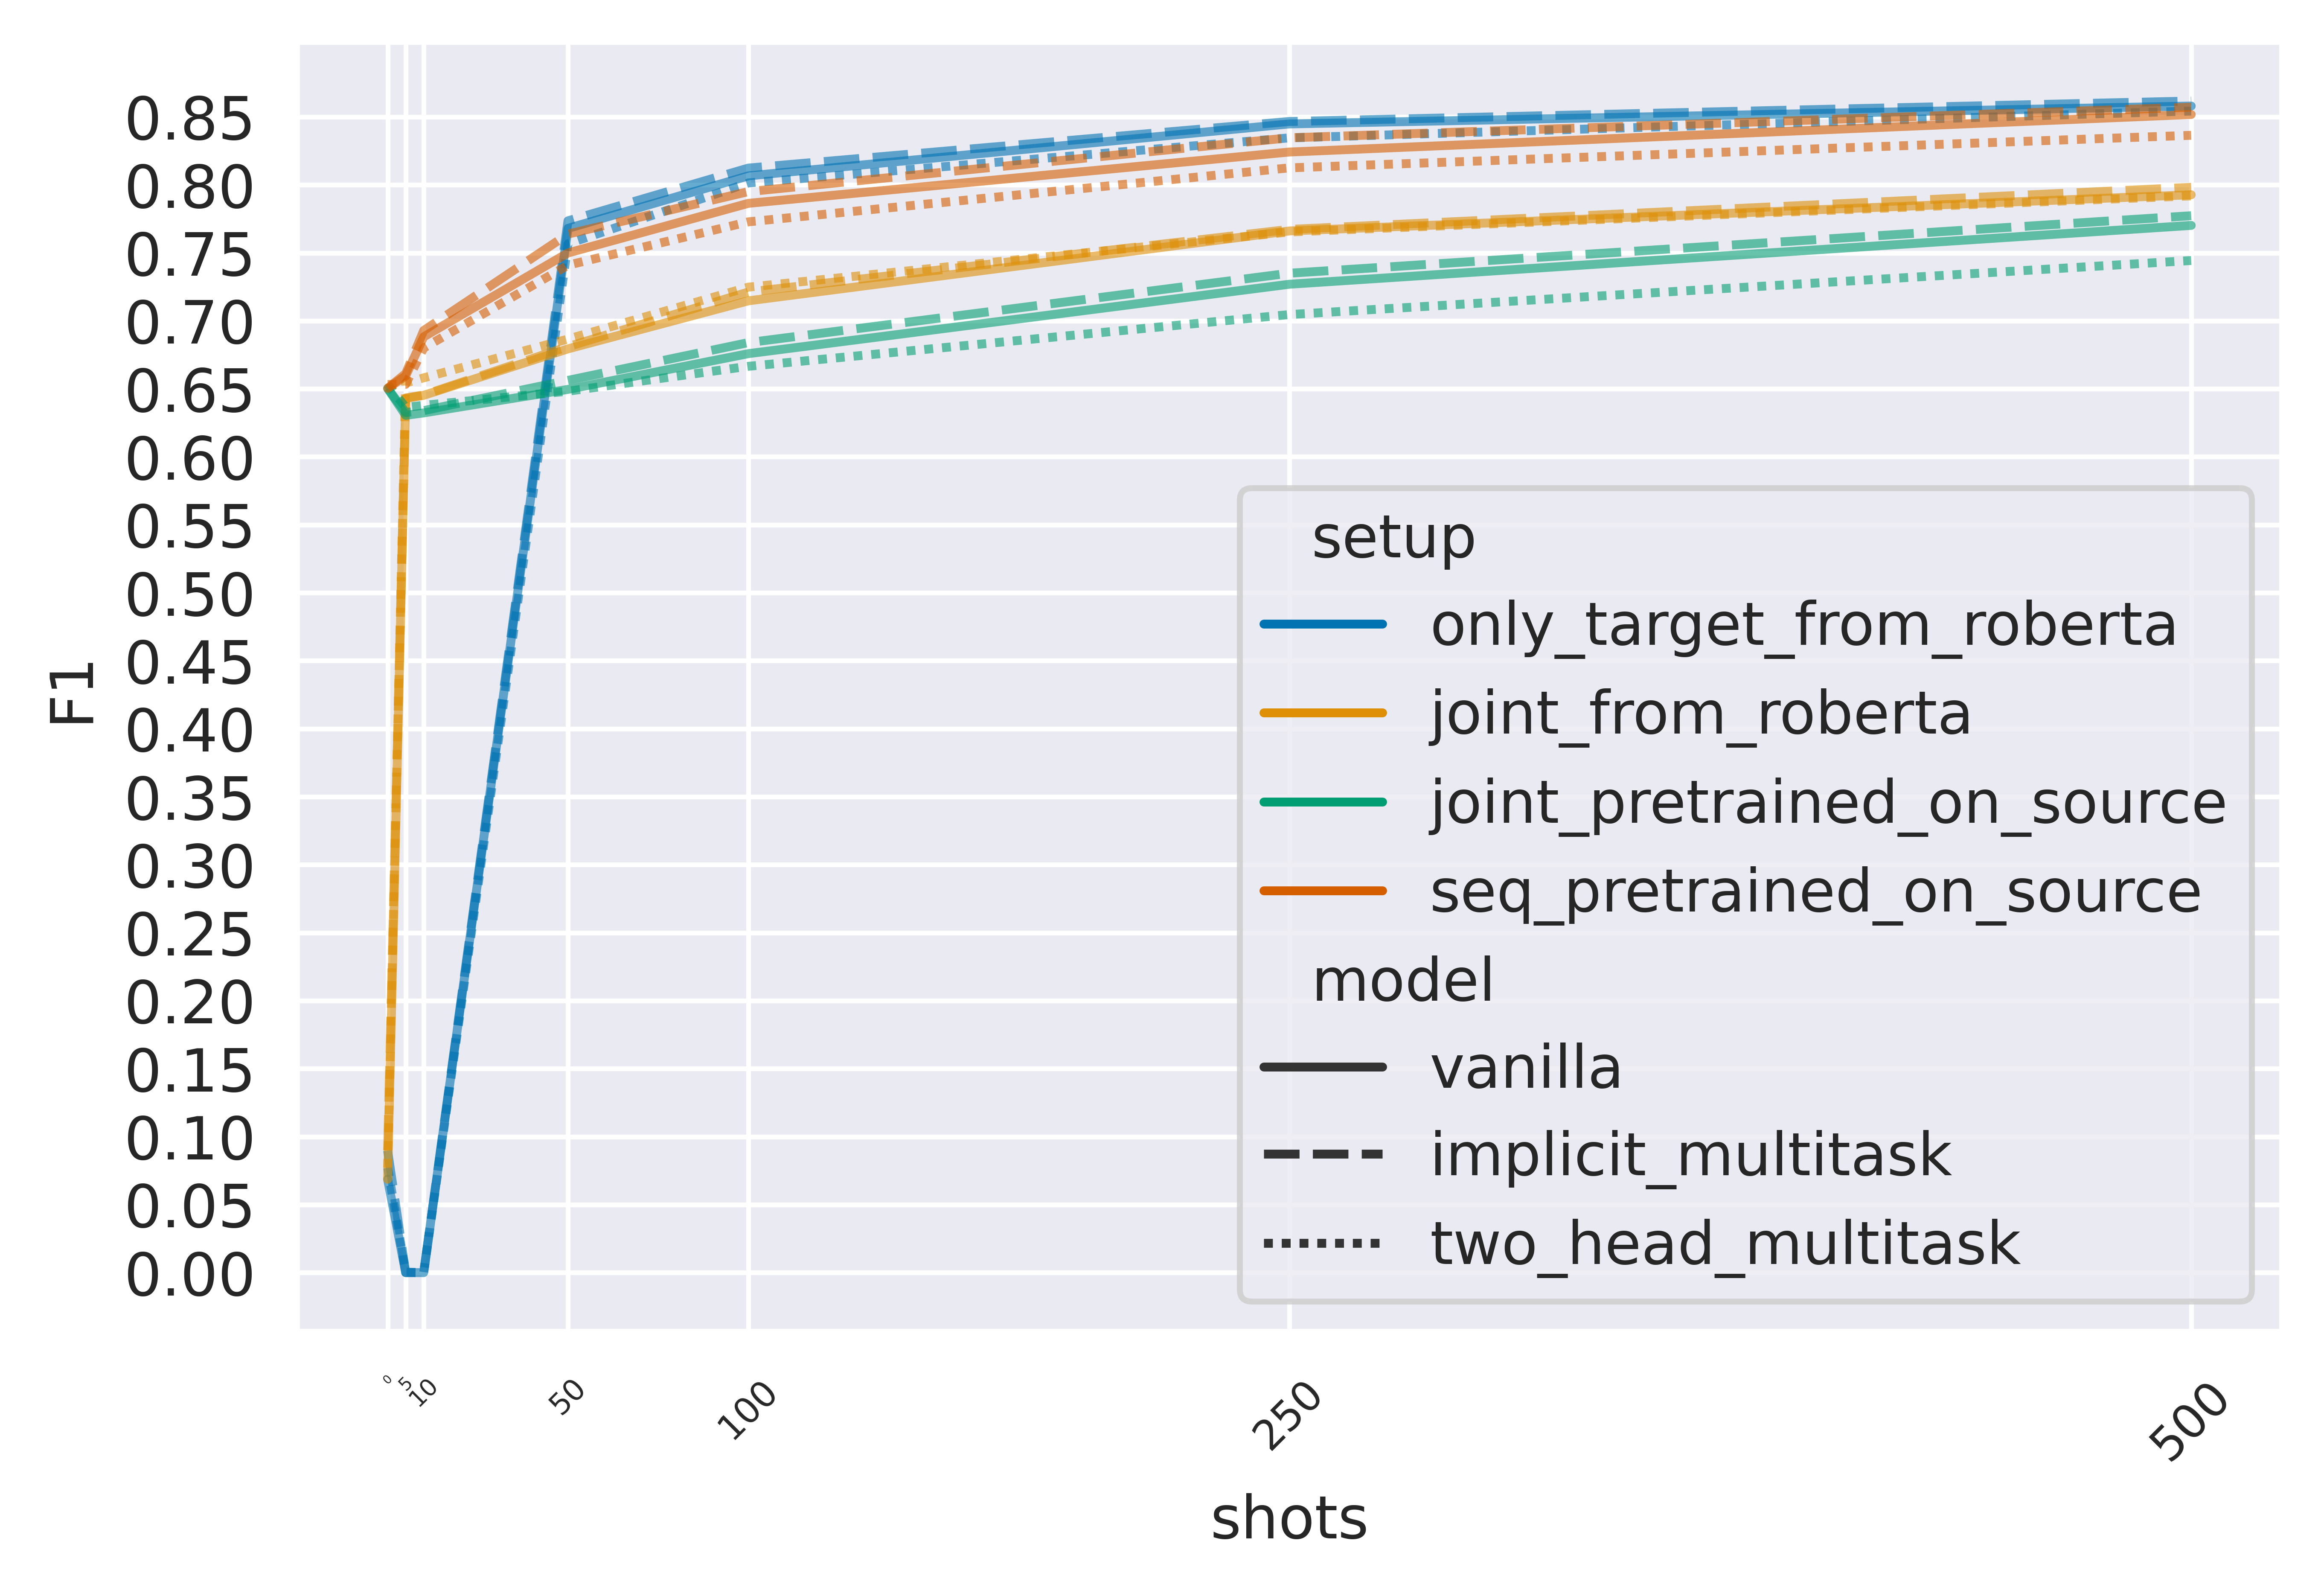

In [8]:
plot_graph(df_f1)